## Import Data

In [220]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Cleaning/ Preprocessing

In [222]:
heart.isna().sum().sort_values(ascending= False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

So amazing, there are not missing values to handle. So we will skip to the EDA step

### EDA

Text(0.5, 1.0, 'Properties in Age')

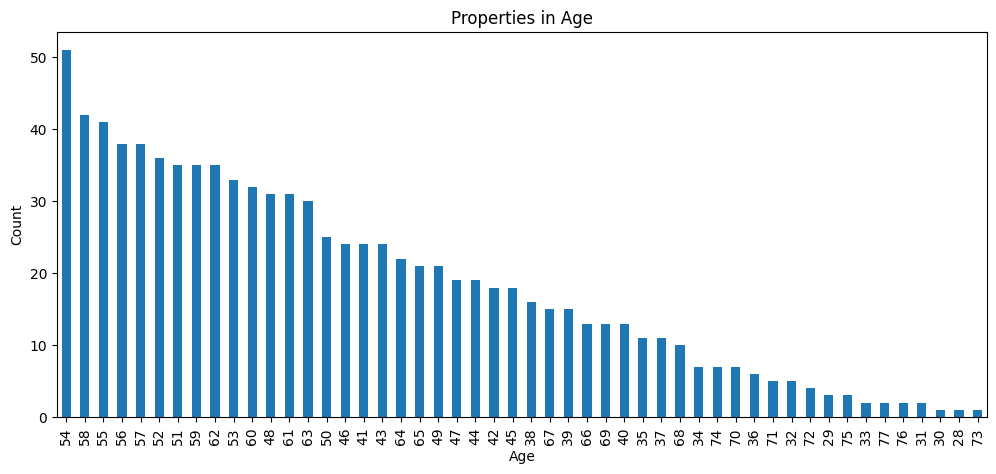

In [223]:
plt.figure(figsize= (12, 5))
heart['Age'].value_counts().plot(kind= 'bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Properties in Age')

Text(0.5, 1.0, 'Unit of Sex')

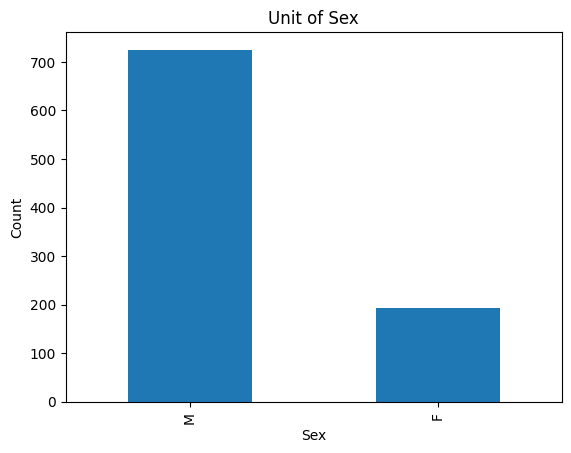

In [224]:
heart['Sex'].value_counts().plot(kind= 'bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Unit of Sex')

Text(0.5, 1.0, 'Properties in Exercises')

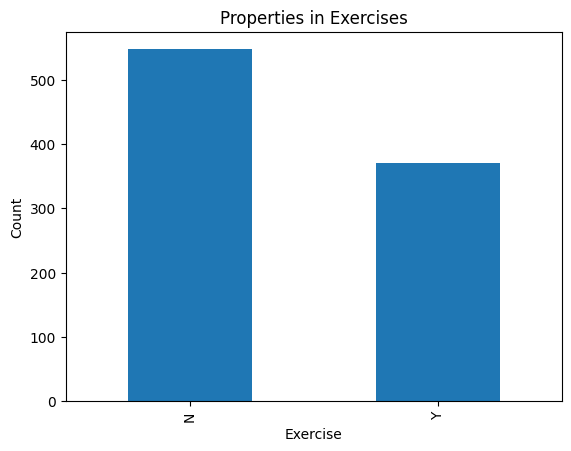

In [225]:
heart['ExerciseAngina'].value_counts().plot(kind= 'bar')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.title('Properties in Exercises')

Looking at the barplots above:
1. Most of age in this dataset is middle age and approaching old age (59-60), specially the age of 54
2. Properties about sex are concentrated on Male (> 700)
3. Probability of people who do not exercise is more than that of people who exercise, particularly 550 and 350

#### Plot 3 features above with probability of heart disease

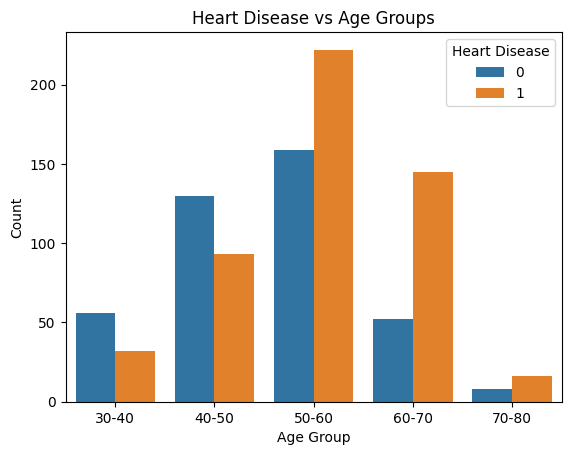

In [226]:
# Group data by age to create age bins
heart['AgeGroup'] = pd.cut(heart['Age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

# Plot bar plot
sns.countplot(x='AgeGroup', hue='HeartDisease', data= heart)
plt.title('Heart Disease vs Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

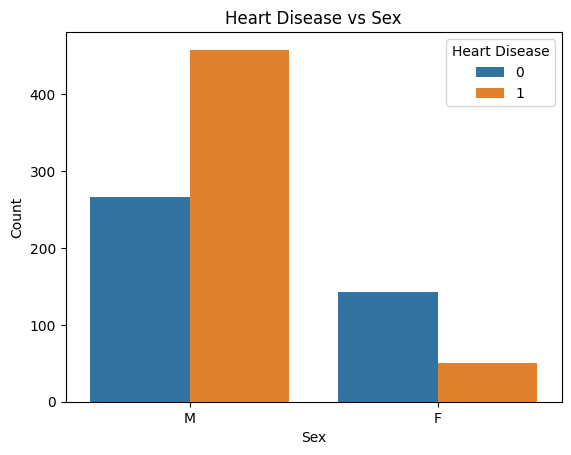

In [227]:
#Plot bar plot
sns.countplot(x= 'Sex', hue= 'HeartDisease', data= heart)
plt.title('Heart Disease vs Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

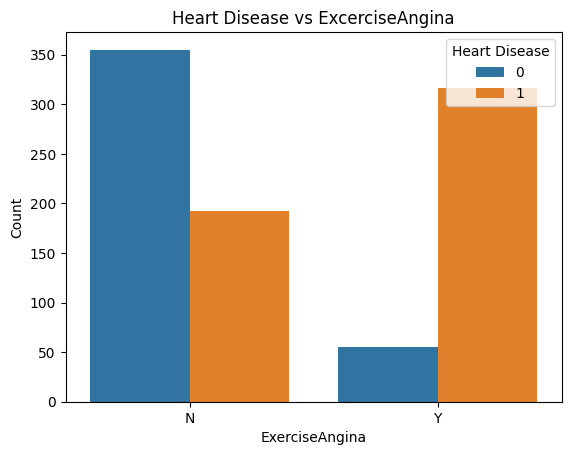

In [228]:
#Plot bar plot
sns.countplot(x= 'ExerciseAngina', hue= 'HeartDisease', data= heart)
plt.title('Heart Disease vs ExcerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.legend(title= 'Heart Disease', loc= 'upper right')
plt.show()

You can see the relationship between the features before and heart disease:
1. Most of people from 50-70 will have high probability of heart disease 
2. Definitely, Men have a higher rate of heart disease than women
3. It's an incredible thing that people who do not exercise have lower rate of heart disease than peolple exercise. It's so strange

### Feature Engineering

1. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [229]:
heart.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
AgeGroup          category
dtype: object

In [230]:
#Select Numerical Features for Z-score Calculation
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']

# Create a subset of the dataframe with the selected columns
df_numerical = heart[numerical_cols]

In [231]:
df_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR
0,40,140,289,0,172
1,49,160,180,0,156
2,37,130,283,0,98
3,48,138,214,0,108
4,54,150,195,0,122


- Function to calculate Z-scores

In [232]:
## Calculate Z-scores
def calculate_Z_scores(df):
    # Create an empty DataFrame to store Z-scores
    z_scores_df = pd.DataFrame()
    
    # Iterate over each column to calculate the Z-score
    for col in df.columns:
        mean = np.mean(df[col])
        st_dev = np.std(df[col])
        
        z_scores_df[col] = (df[col] - mean) / st_dev
        
    return z_scores_df

In [233]:
z_scores = np.abs(calculate_Z_scores(df_numerical))

In [234]:
z_scores[:5]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR
0,1.433140,0.410909,0.825070,0.551341,1.382928
1,0.478484,1.491752,0.171961,0.551341,0.754157
2,1.751359,0.129513,0.770188,0.551341,1.525138
3,0.584556,0.302825,0.139040,0.551341,1.132156
4,0.051881,0.951331,0.034755,0.551341,0.581981


Typically, a Z-score greater than 3 or less than -3 is considered an outlier. Now, you can filter out rows where any of the numerical columns have Z-scores outside this range.

In [235]:
# Extract outliers 
outliers = (z_scores > 3).any(axis= 1)

# Keep only rows without outliers
df_no_outliers = heart[~outliers]

# Print the shape of the new dataframe
print(f"Original dataset shape: {heart.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (918, 13)
Dataset shape after removing outliers: (906, 13)


In [236]:
df_no_outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,30-40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,30-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-60


2. Convert text columns to numbers using label encoding and one hot encoding

In [237]:
df_no_outliers.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
AgeGroup          category
dtype: object

In [238]:
df_no_outliers.drop('AgeGroup', axis= 1, inplace= True)

C:\Users\ngmin\AppData\Local\Temp\ipykernel_25944\1880610448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop('AgeGroup', axis= 1, inplace= True)


- You can see that the RestingECG and ST_Slope are ordinal categorical features, so we will use Label Encoder method to convert to numbers
- The remaining text columns are norminal categorical features, so we will use One-hot-encoding method to convert to numbers

In [239]:
# Covert those norminal categorical features to number
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

nor_categorical_cols = ['Sex', 'ChestPainType', 'ExerciseAngina']

one_hot_encode = encoder.fit_transform(df_no_outliers[nor_categorical_cols])

one_hot_df = pd.DataFrame(one_hot_encode, columns= encoder.get_feature_names_out(nor_categorical_cols), index= df_no_outliers.index)

df_encoded = pd.concat([df_no_outliers, one_hot_df], axis= 1)

df_encoded.drop(nor_categorical_cols, axis= 1, inplace= True)

In [240]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,Normal,172,0.0,Up,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,49,160,180,0,Normal,156,1.0,Flat,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,0,ST,98,0.0,Up,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,48,138,214,0,Normal,108,1.5,Flat,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,150,195,0,Normal,122,0.0,Up,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [241]:
# Covert those ordinal categorical features to number
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

df_encoded['RestingECG'] = label_encode.fit_transform(df_encoded['RestingECG'])
df_encoded['ST_Slope'] = label_encode.fit_transform(df_encoded['ST_Slope'])

In [242]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,1,172,0.0,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,49,160,180,0,1,156,1.0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,130,283,0,2,98,0.0,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,48,138,214,0,1,108,1.5,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,54,150,195,0,1,122,0.0,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Looking at the DataFrame, now we completed to convert all text columns to number

3. Apply Scailing

In [243]:
from sklearn.preprocessing import StandardScaler

exception_col = ['HeartDisease']

features = df_encoded.drop(exception_col, axis= 1)

standard = StandardScaler()

scailed_features = standard.fit_transform(features)

df_scailed = pd.DataFrame(scailed_features, columns= features.columns)

df_scailed[exception_col] = df_encoded[exception_col].values


In [244]:
df_scailed.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,HeartDisease
0,-1.432687,0.460750,0.848846,-0.549294,0.012241,1.389406,-0.83126,1.046060,-0.515134,0.515134,-1.082895,2.073221,-0.532246,-0.231276,0.823273,-0.823273,0
1,-0.477875,1.624344,-0.169349,-0.549294,0.012241,0.756186,0.10838,-0.605038,1.941242,-1.941242,-1.082895,-0.482341,1.878829,-0.231276,0.823273,-0.823273,1
2,-1.750958,-0.121047,0.792799,-0.549294,1.596561,-1.539237,-0.83126,1.046060,-0.515134,0.515134,-1.082895,2.073221,-0.532246,-0.231276,0.823273,-0.823273,0
3,-0.583965,0.344390,0.148253,-0.549294,0.012241,-1.143474,0.57820,-0.605038,1.941242,-1.941242,0.923450,-0.482341,-0.532246,-0.231276,-1.214664,1.214664,1
4,0.052577,1.042547,-0.029230,-0.549294,0.012241,-0.589407,-0.83126,1.046060,-0.515134,0.515134,-1.082895,-0.482341,1.878829,-0.231276,0.823273,-0.823273,0


In [245]:
df_scailed.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
RestingECG           0
MaxHR                0
Oldpeak              0
ST_Slope             0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
ExerciseAngina_N     0
ExerciseAngina_Y     0
HeartDisease         0
dtype: int64

### Building models

In [246]:
X = df_scailed.drop('HeartDisease', axis= 1)
y = df_scailed['HeartDisease']

In [247]:
X.shape

(906, 16)

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 30)

In [249]:
# SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(random_state= 123)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_score = round(100 * accuracy_score(y_pred_svm, y_test), 2)
print('Accuracy of SVM model:', 100*accuracy_score(y_pred_svm, y_test))

Accuracy of SVM model: 87.36263736263736


In [250]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
lgr_score = round(100 * accuracy_score(y_pred_lgr, y_test), 2)
print('Accuracy of Logistic Regression Model:', 100*accuracy_score(y_pred_lgr, y_test))

Accuracy of Logistic Regression Model: 85.16483516483517


In [251]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_score = round(100 * accuracy_score(y_pred_rf, y_test), 2)
print('Accuracy of Random Forest Model:', 100*accuracy_score(y_pred_rf, y_test))

Accuracy of Random Forest Model: 87.36263736263736


In [252]:
# Naive Bayes Model 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_score = round(100 * accuracy_score(y_pred_nb, y_test), 2)
print('Accuracy of Naive Bayes Model:', 100*accuracy_score(y_pred_nb, y_test))

Accuracy of Naive Bayes Model: 85.16483516483517


In [253]:
models = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Random Forest Classifier', 'Naive Bayes'],
    'Scores': [svm_score, lgr_score, rf_score, nb_score]
})

models.sort_values(by= 'Scores', ascending= False)

,Model,Scores
0,SVM,87.36
2,Random Forest Classifier,87.36
1,Logistic Regression,85.16
3,Naive Bayes,85.16


So you can see the DataFrame I create, the best model for this dataset is Random Forest Classifier with the score is 88.46%

Text(95.72222222222221, 0.5, 'Actual')

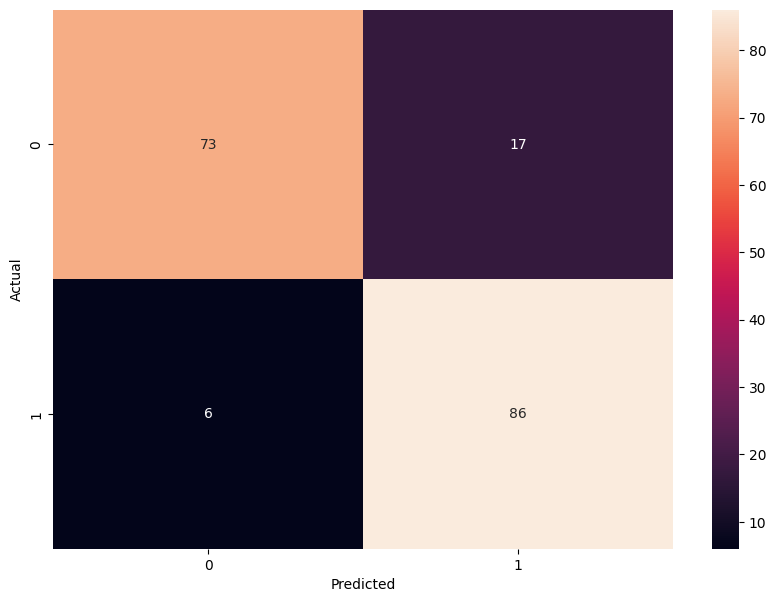

In [254]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize= (10, 7))
sns.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Actual")


### Algorithm Tunning

- As result above, Random Forest is the best model for this dataset, so I will improve the accuracy of this model by tuning its hyperparameters.

In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        90
           1       0.83      0.93      0.88        92

    accuracy                           0.87       182
   macro avg       0.88      0.87      0.87       182
weighted avg       0.88      0.87      0.87       182



- Using GridSearchCV for hyperparameter tuning

In [256]:
from sklearn.model_selection import GridSearchCV

# Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up and run GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv = 5, scoring= 'roc_auc', n_jobs= 1, verbose= 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [257]:
grid_search_table = pd.DataFrame(grid_search.cv_results_)
grid_search_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.208698,0.067422,0.064351,0.042343,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.928048,0.889275,0.909144,0.921312,0.937488,0.917053,0.016678,106
1,0.344594,0.044232,0.014719,0.002122,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.931713,0.889082,0.912230,0.921312,0.940427,0.918953,0.017703,82
2,0.500341,0.066975,0.041885,0.028012,None,1,2,300,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.932099,0.888407,0.911651,0.921312,0.940133,0.918720,0.017962,91
3,0.206454,0.042856,0.028291,0.041674,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.929591,0.887249,0.912230,0.927216,0.935332,0.918324,0.017309,98
4,0.423108,0.051844,0.018070,0.014390,None,1,5,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.930748,0.886188,0.908565,0.930120,0.936508,0.918426,0.018719,95


In [258]:
grid_search_table[['param_n_estimators', 'params', 'mean_test_score']].sort_values('mean_test_score', ascending= False).head()

,param_n_estimators,params,mean_test_score
46,200,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.923662
49,200,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.923662
47,300,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.923583
50,300,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.923583
104,300,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.923355


In [259]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [260]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [261]:
from sklearn.metrics import roc_auc_score

# Best model from grid search
best_search = grid_search.best_estimator_

# Predict on the test set
y_pred = best_search.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

              precision    recall  f1-score   support

           0       0.95      0.81      0.87        90
           1       0.84      0.96      0.89        92

    accuracy                           0.88       182
   macro avg       0.89      0.88      0.88       182
weighted avg       0.89      0.88      0.88       182

ROC-AUC Score: 0.883816425120773


Text(95.72222222222221, 0.5, 'Actual')

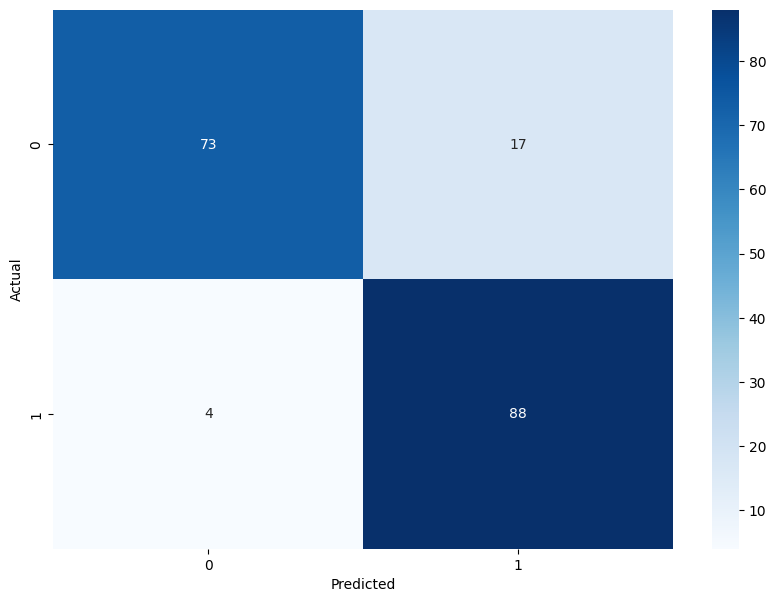

In [262]:
final_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (10, 7))
sns.heatmap(final_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

- Test the model for few properties

In [263]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
       'Oldpeak', 'ST_Slope', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'ExerciseAngina_N', 'ExerciseAngina_Y'],
      dtype='object')

In [264]:
def predict_disease(age, resting_bp, cholesterol, fasting_bs, resting_ecg, max_hr,
                    oldpeak, st_slope, sex,  chest_pain_type, exercise_angina):
    # Make zeros array with columns by features in the data (Tạo mảng zeros với số cột bằng số feature trong dữ liệu)
    x = np.zeros(len(X.columns))
    
    # Fill numeric features (Gán các giá trị liên tục)
    x[0] = age
    x[1] = resting_bp
    x[2] = cholesterol
    x[3] = fasting_bs
    x[4] = resting_ecg
    x[5] = max_hr
    x[6] = oldpeak
    x[7] = st_slope
    
    # Gán các giá trị one-hot encoding cho các feature dạng phân loại
    if sex == "F":
        x[X.columns.get_loc("Sex_F")] = 1
    elif sex == "M":
        x[X.columns.get_loc("Sex_M")] = 1
        
    if chest_pain_type == "ASY":
        x[X.columns.get_loc("ChestPainType_ASY")] = 1
    elif chest_pain_type == "ATA":
        x[X.columns.get_loc("ChestPainType_ATA")] = 1
    elif chest_pain_type == "NAP":
        x[X.columns.get_loc("ChestPainType_TA")] = 1
    
    if exercise_angina == "N":
        x[X.columns.get_loc("ExerciseAngina_N")] = 1
    elif exercise_angina == "Y":
        x[X.columns.get_loc("ChestPainType_Y")] = 1
    
    # Dự đoán sử dụng mô hình đã huấn luyện 
    return best_search.predict([x])[0]

In [265]:
predict_disease(
    age=45, 
    resting_bp=130, 
    cholesterol=200, 
    fasting_bs=0, 
    resting_ecg=1, 
    max_hr=150, 
    oldpeak=2.3, 
    st_slope=2, 
    sex="M", 
    chest_pain_type="ASY", 
    exercise_angina="N"
)

d:\Python Download\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

### Model Deployment

In [266]:
import pickle
with open('heart_disease_model.pickle','wb') as f:
    pickle.dump(best_search, f)

In [267]:
import json 
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [268]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# X_pca = pca.fit_transform(X)
# X_pca.shape

# pca.explained_variance_ratio_

# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.2, random_state= 30)

# model = {
#     'SVM': SVC(),
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Random Forest Classifier': RandomForestClassifier(),
#     'Naive Bayes': GaussianNB()
# }

# score = []

# for name, m in model.items():
#     m.fit(X_train_pca, y_train_pca)
    
#     y_pred = m.predict(X_test_pca)
    
#     sco = round(100*accuracy_score(y_pred, y_test_pca), 2)
    
#     score.append({'Models': name, 'Scores': sco})
    
    
# df_pca = pd.DataFrame(score)
# df_pca.sort_values(by= 'Scores', ascending= False)